#Tarea 1: Fundamentos de Redes Neuronales profundas

----

Estudiante: Rafael Contreras

CI: 30391915

## 1. Introduccion

### Notebooks libro UDL


Anexados notebooks del libro del libro UDL

### Integrar la pregunta en la seccion Evaluacion

Notebooks 7.2 y 7.3.
Verifique que los resultados obtenidos son los mismos a los del notebook.

### Informe sobre preguntas practicas

link al informe

### Resolucion de los notebooks

Document

### Experimento final

Experimento (intro)

## Evaluacion (Parte 2)

### Backpropagation

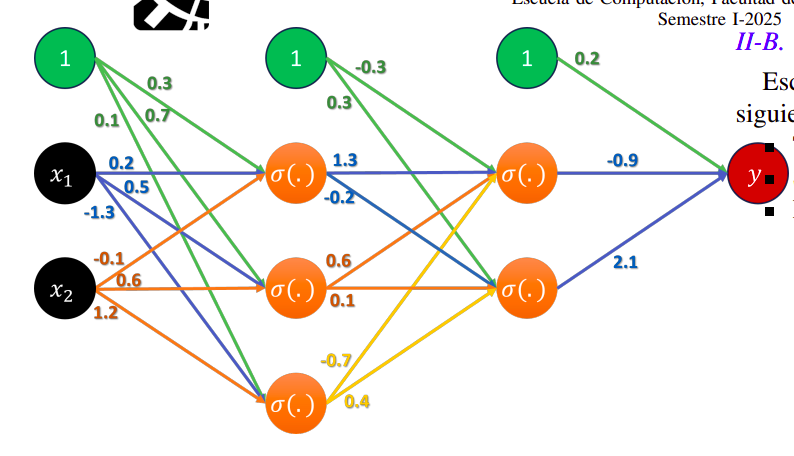

Considere la red neuronal de arriba. Cada neurona oculta utiliza una funcion de activacion sigmoide

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

La funcion de perdida es el error cuadratico medio (MSE), y los puntos de datos son:

$$
(x_1, x_2, y)_i
$$
$$
i = 1, 2, 3 = \{(1, 1, 1),(0, 2, 1),(−1, 1, 0)\}
$$

Las unidades de entrada son negras, los biases son verdes, las unidades ocultas son naranjas, y la unidad de salida es roja. Los pesos estan indicados en las flechas correspondientes.

- Calcula analıticamente el gradiente mediante backpropagation, desarrollando todos los pasos correspondientes.
- Identifica todas las componentes explicadas en la seccion 7.4 ecuacion 7.24 en el caso del paso hacia adelante.

$$
f_0 = β_0 + Ω_{0x_i} \\
h_k = a [f_{k−1}] \quad k ∈ {1, 2, . . . , K} \\
f_k = β_k + Ω_kh_k. \quad k ∈ {1, 2, . . . , K}
$$

- Modifique la ecuacion 7.25 para la nueva funcion de activacion

- Identifica todas las componentes explicadas en la seccion 7.4 de la ecuacion modificada 7.25 en el caso del paso hacia atras
- Luego, realiza un paso de descenso de gradiente (batch, simple) con tasa de aprendizaje igual a 1.
- ¿Cuales son los nuevos pesos?

**Nota**: No es necesario usar una computadora. Todo puede
resolverse con lapiz y papel.

Verificar que la nueva pérdida efectivamente ha disminuido también es una buena pista.

#### Respuestas

##### Componentes del forward pass

Se hace primero los componentes del forward pass para referenciar las funciones durante el calculo del gradiente. Tenemos:

$$
\begin{align*}
\boldsymbol{\beta}_0 &= [0.3,0.7,0.1] \\
\boldsymbol{\Omega}_0 &= [ \\
  & \quad [0.2,-0.1], \\
  & \quad [0.5,0.6], \\
  & \quad [-1.3,1.2], \\
]
\\ \\
\boldsymbol{\beta}_1 &= [0.3,0.7] \\
\boldsymbol{\Omega}_1 &= [ \\
  & \quad [1.3,-0.2,-0.7], \\
  & \quad [0.6,0.1,0.4], \\
]
\\ \\
\boldsymbol{\beta}_2 &= [0.2] \\
\boldsymbol{\Omega}_2 &= [ \\
  & \quad [-0.9,2.1], \\
]
\end{align*}
$$

Componentes:

$$
\begin{align*}
\mathbf{f}_0 &= \boldsymbol{\beta}_0 + \boldsymbol{\Omega}_0 \mathbf{x}_i \\
\mathbf{h}_1 &= \sigma[\mathbf{f}_0] \\
\mathbf{f}_1 &= \boldsymbol{\beta}_1 + \boldsymbol{\Omega}_1 \mathbf{h}_1 \\
\mathbf{h}_2 &= \sigma[\mathbf{f}_1] \\
\mathbf{f}_2 &= \boldsymbol{\beta}_2 + \boldsymbol{\Omega}_2 \mathbf{h}_2 \\
\ell_i &= \frac{1}{n}\sum^n_i(\mathbf{f}_{2_i} - y_i)^2,
\end{align*}
$$

##### Componentes del backward pass 7.4

Capa 2

$$
\begin{align*}
\frac{\partial \ell}{\partial \mathbf{f}_2} &= 2 * (f_2 - y)
\\
\frac{\partial \ell}{\partial \mathbf{\beta}_2} &= \frac{\partial \ell}{\partial \mathbf{f}_2}
\\
\frac{\partial \ell}{\partial \mathbf{\Omega}_2} &= \frac{\partial \ell}{\partial \mathbf{f}_2} \mathbf{h}_2^T
\end{align*}
$$

Capa 1

$$
\begin{align*}
\frac{\partial \ell}{\partial \mathbf{f}_1} &= h_{1}(1-h_{1}) \odot \left( \boldsymbol{\Omega}_2^T \frac{\partial \ell}{\partial \mathbf{f}_2} \right)
\\
\frac{\partial \ell}{\partial \mathbf{\beta}_1} &= \frac{\partial \ell}{\partial \mathbf{f}_1}
\\
\frac{\partial \ell}{\partial \mathbf{\Omega}_1} &= \frac{\partial \ell}{\partial \mathbf{f}_1} \mathbf{h}_1^T
\end{align*}
$$

Capa 0

$$
\begin{align*}
\frac{\partial \ell}{\partial \mathbf{f}_0} &= h_{0}(1-h_{0}) \odot \left( \boldsymbol{\Omega}_1^T \frac{\partial \ell}{\partial \mathbf{f}_1} \right)
\\
\frac{\partial \ell}{\partial \mathbf{\beta}_0} &= \frac{\partial \ell}{\partial \mathbf{f}_0}
\\
\frac{\partial \ell}{\partial \mathbf{\Omega}_0} &= \frac{\partial \ell}{\partial \mathbf{f}_0} \mathbf{h}_0^T
\end{align*}
$$

##### Calculo del gradiente

In [22]:
sigmoid(np.array([0]))

array([0.5])

Variable por variable tenemos lo siguiente para $(x_1,x_2,y)_1$:

$$
\begin{align*}
\mathbf{f}_0 &= [0.3,0.7,0.1] + [0.1,1.1,-0.1] = [0.4,1.8,0]
\\
\mathbf{h}_1 &= [0.598, 0.858, 0.5]
\\
\mathbf{f}_1 &= [0.3,0.7] + [0.2558, 0.6446] = [0.5558, 1.3446]
\\
\mathbf{h}_2 &= [0.635, 0.793]
\\
\mathbf{f}_2 &= [0.2] + [1.093] = [3.093]
\\
\ell_i &= (3.093 - 1)^2 = 4.380
\end{align*}
$$


In [38]:
import numpy as np
np.array([4.186]) * np.array([0.635,0.793]).T

array([2.65811 , 3.319498])

Ahora calcularemos los gradientes usando las variables del forward pass.

Capa 2

$$
\begin{align*}
\frac{\partial \ell}{\partial \mathbf{f}_2} &= 2 * ([3.093] - [1]) = [4.186]
\\
\frac{\partial \ell}{\partial \mathbf{\beta}_2} &=  [4.186]
\\
\frac{\partial \ell}{\partial \mathbf{\Omega}_2} &= [4.186] * [0.635, 0.793]^T = [2.658,3.319]
\end{align*}
$$

Capa 1

$$
\frac{\partial \ell}{\partial \mathbf{f}_1} = [0.598,0.858,0.5] * (1-[0.598,0.858,0.5]) \odot ([[-0.9],[2.1]]) * [4.186]
\\
\frac{\partial \ell}{\partial \mathbf{f}_1} = [0.240396, 0.121836, 0.25 ] \odot [[-3.7674],[ 8.7906]]
\\
\frac{\partial \ell}{\partial \mathbf{f}_1} = [\\
  [-0.90566789, -0.45900495, -0.94185   ], \\
  [ 2.11322508,  1.07101154,  2.19765   ]\\
]\\
\frac{\partial \ell}{\partial \mathbf{\beta}_1} = \frac{\partial \ell}{\partial \mathbf{f}_1}
\\
\frac{\partial \ell}{\partial \mathbf{\Omega}_1} = \frac{\partial \ell}{\partial \mathbf{f}_1} * [[0.598],[0.858],[0.5]] \\
\frac{\partial \ell}{\partial \mathbf{\Omega}_1} = [\\
[-0.5415894 , -0.39382624, -0.470925  ],\\
[ 1.2637086 ,  0.9189279 ,  1.098825  ] \\
]
$$

##### Ecuacion 7.25 para la nueva funcion de activacion

Tomando en cuenta que:

$$
\frac{d}{dt}\sigma(t) = \sigma(t)(1-\sigma(t)).
$$

Tenemos lo siguiente

$$
\begin{align*}
\frac{\partial \ell_i}{\partial \boldsymbol{\beta}_k} &= \frac{\partial \ell_i}{\partial \mathbf{f}_k} & k \in \{K, K-1, \ldots, 1\}
\\
\frac{\partial \ell_i}{\partial \boldsymbol{\Omega}_k} &= \frac{\partial \ell_i}{\partial \mathbf{f}_k} \mathbf{h}_k^T & k \in \{K, K-1, \ldots, 1\}
\\
\frac{\partial \ell_i}{\partial \mathbf{f}_{k-1}} &= \sigma(f_{k-1})(1-\sigma(f_{k-1})) \odot \left( \boldsymbol{\Omega}_k^T \frac{\partial \ell_i}{\partial \mathbf{f}_k} \right) , & k \in \{K, K-1, \ldots, 1\}
\end{align*}
$$

Dado que durante el forward pass ya calculamos $\sigma(f_{k})$ para todo k, tenemos:

$$
\frac{\partial \ell_i}{\partial \mathbf{f}_{k-1}} = h_{k-1}(1-h_{k-1}) \odot \left( \boldsymbol{\Omega}_k^T \frac{\partial \ell_i}{\partial \mathbf{f}_k} \right)
$$